# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>
# <center> Белова Юлия, МОиАД </center>

В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
import librosa as lb
import librosa.display
import IPython.display as ipd
import scipy 
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [28]:
# В .wav файле хранится оцифрованный аудиопоток. Параметры можно узнать в свойствах файла.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

**Загружаем цифровой сигнал с частотой дискретизации sr = 44,1 кГц**

In [1165]:
y, sr = lb.load("my_voice.wav", sr = None)
ipd.Audio(data = y, rate = sr)

**Меняем частоту дискретизации на 22 050 Гц, 8000 Гц**

In [798]:
ipd.Audio(data = y, rate = 22050)

In [799]:
ipd.Audio(data = y, rate = 8000)

Вывод: при частоте дискретизации 7-8 кГц уже невозможно разобрать человеческую речь

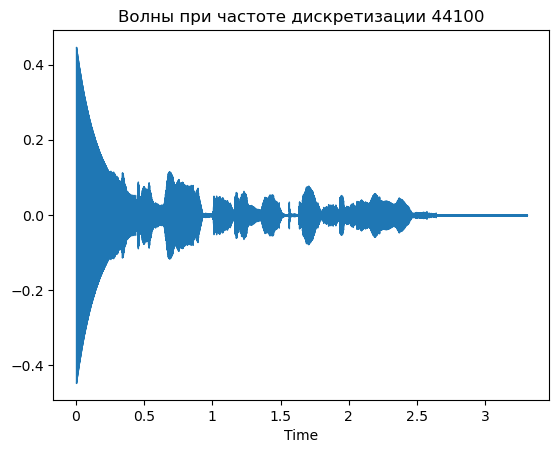

In [800]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
lb.display.waveshow(y, sr=sr, ax=ax)
ax.label_outer()
ax.set_title('Волны при частоте дискретизации 44100')
plt.show()

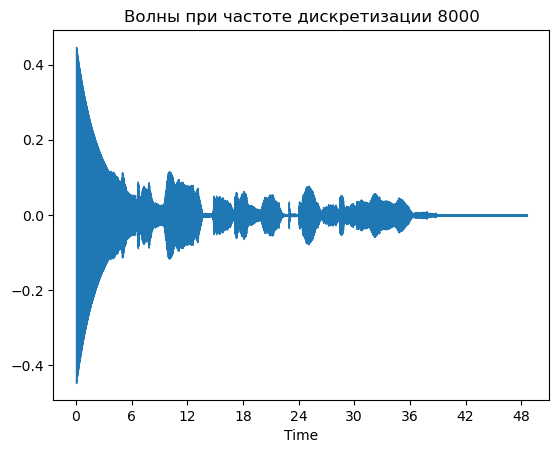

In [801]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
lb.display.waveshow(y, sr=3000, ax=ax)
ax.label_outer()
ax.set_title('Волны при частоте дискретизации 8000')
plt.show()

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

* .wav содержит в себе несжатый аудипоток, сохраняет аудиодорожку в истинном качестве, не проводя манипуляций с аудио-файлом, но поэтому занимает кучу места

* .mp3 и .ogg - форматы со сжатием и потерей качества звука, занимают намного меньше места

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [803]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [804]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

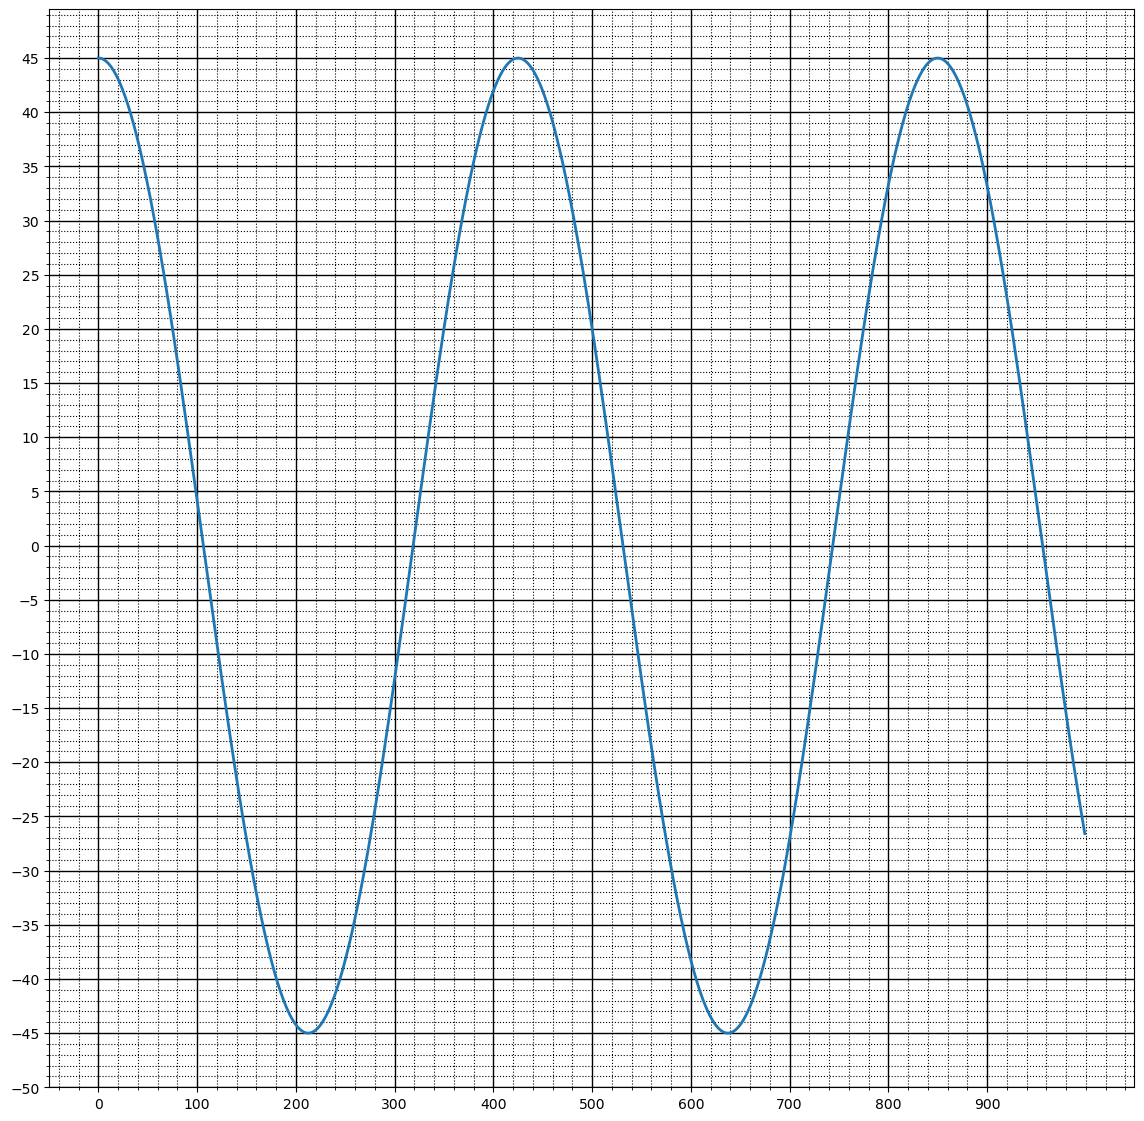

In [36]:
draw_signal(test_data['task2']['a'])

In [805]:
# YOUR CODE HERE
a = np.arange(0,1000)
a = 45*np.cos(2*np.pi/425*a)

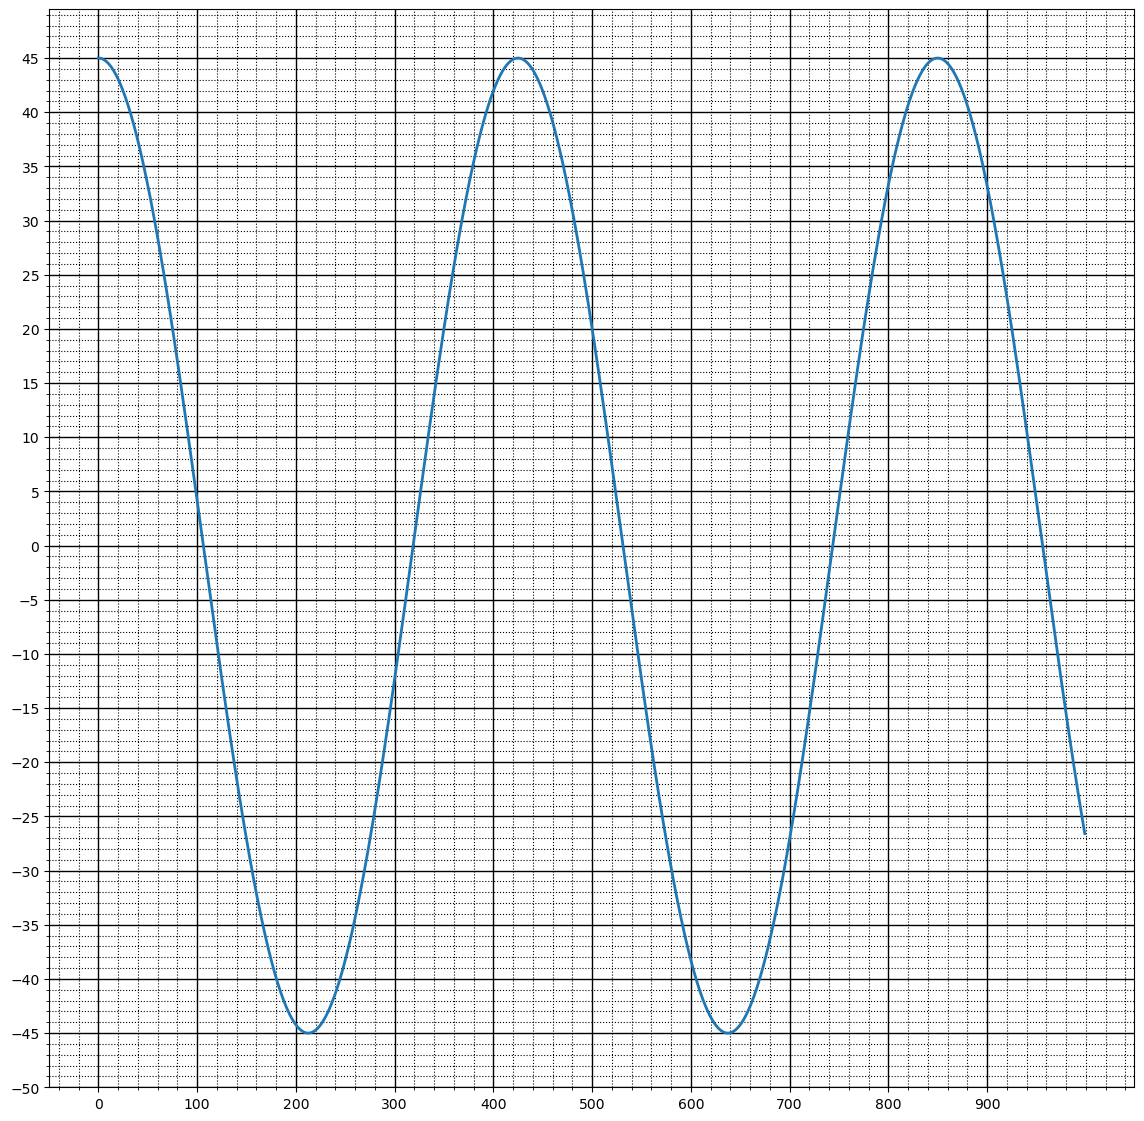

In [806]:
draw_signal(a)

In [807]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A=45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= 0$ (для косинуса)

### Сигнал ***b***

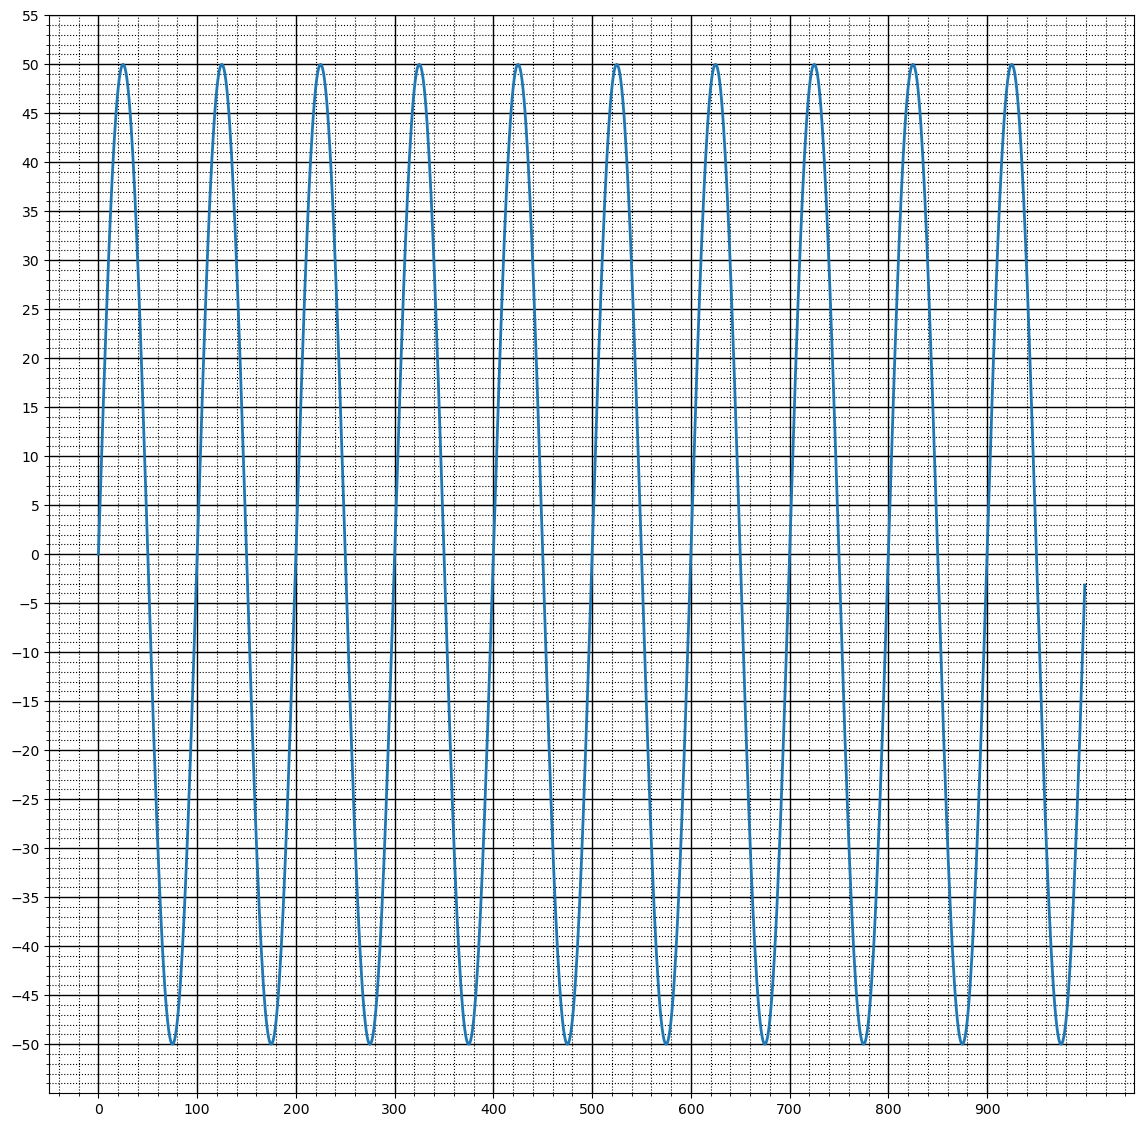

In [808]:
draw_signal(test_data['task2']['b'])

In [41]:
# YOUR CODE HERE
b = np.arange(0,1000)
b = 50*np.sin(2*np.pi/100*b)

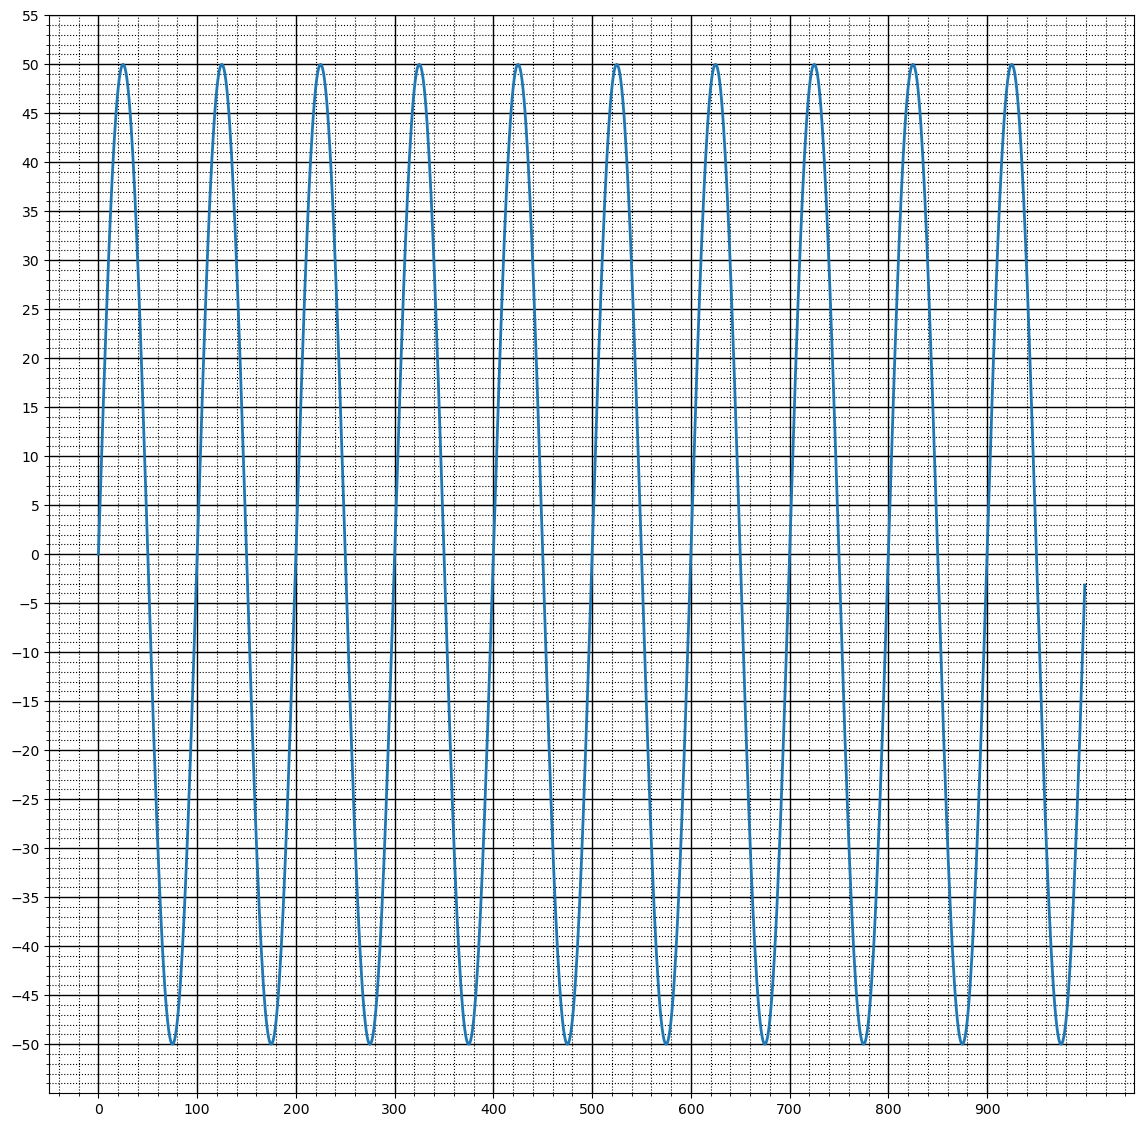

In [42]:
draw_signal(b)

In [43]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A=50 $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi=0$ (для синуса)

### Сигнал ***c***

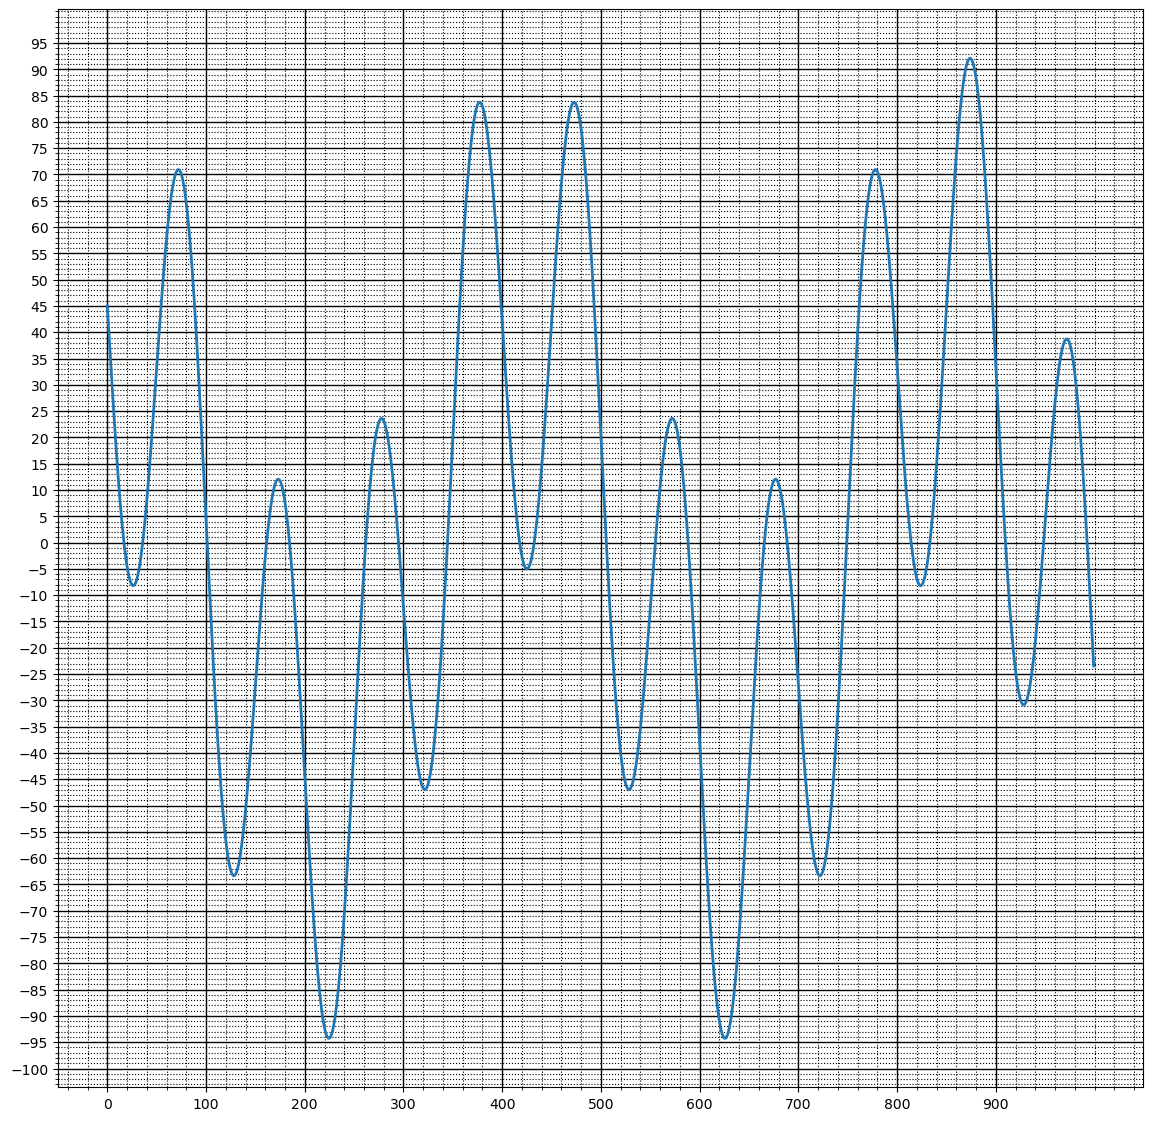

In [44]:
draw_signal(test_data['task2']['c'])

In [1120]:
# сигнал состоит из двух гармоник
# YOUR CODE HERЕ
c = np.arange(0,1000)
c = 48*np.sin(2*np.pi/391*c) + 48*np.sin(2*np.pi/85*c)

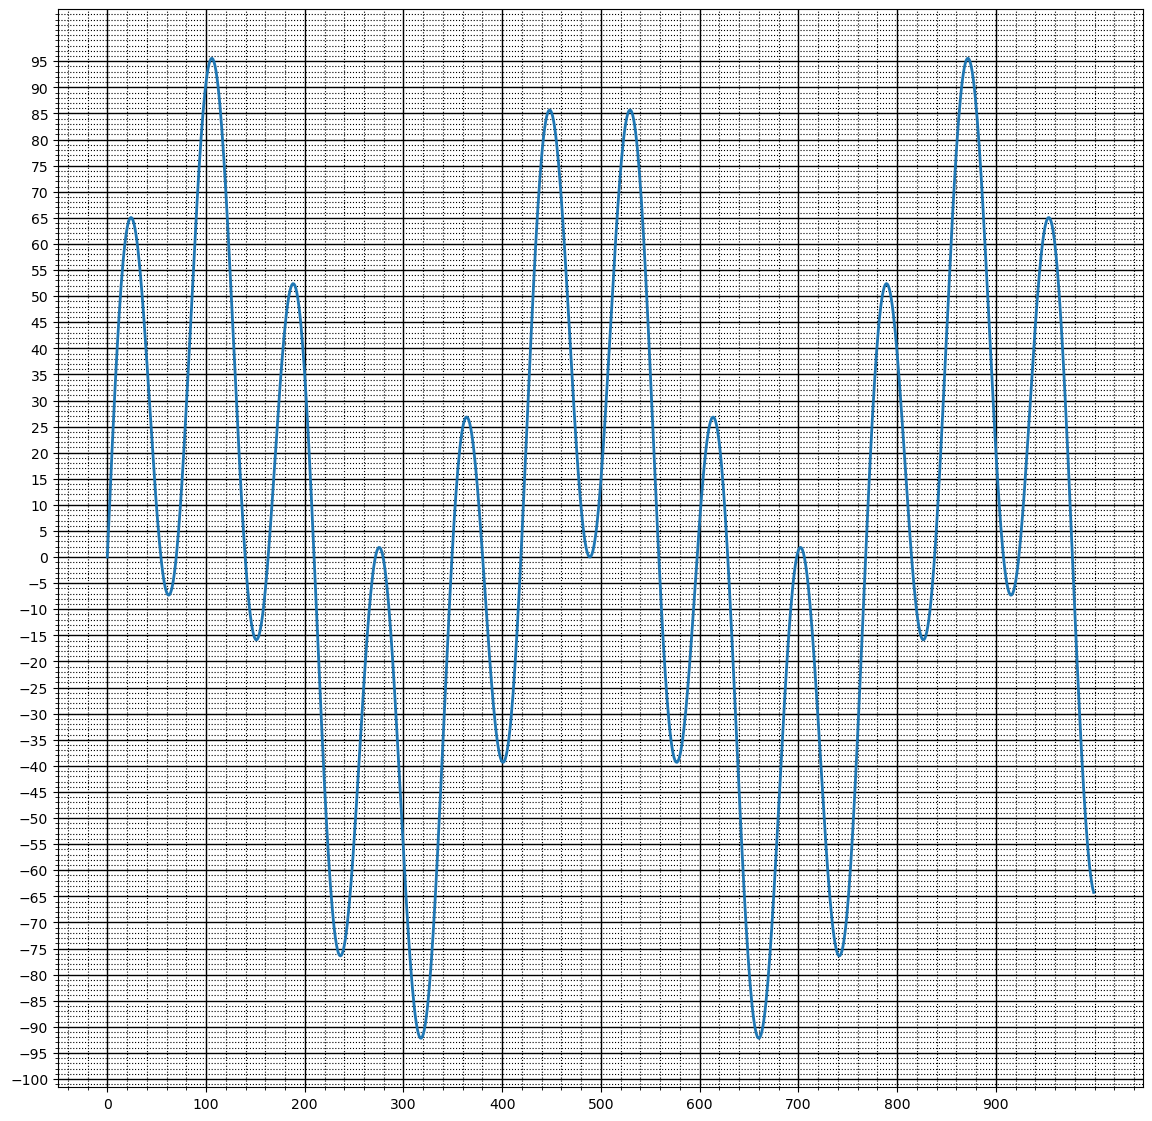

In [1121]:
draw_signal(c)

In [911]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

AssertionError: 

# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [1122]:
def convolve(in1, in2):
    out = np.array([])
    in2 = np.flip(in2)
    tmp = np.array([0]*(len(in2)-1))
    in1 = np.concatenate((tmp,in1,tmp))
    
    for i in range(len(in1)-len(in2)+1):
        ans, j = 0,0
        for k in range(i,i + len(in2)):
            ans += in1[k]*in2[j]
            j += 1

        out = np.append(out, ans)
        
    return out

In [1123]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [1124]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [1125]:
test_convolve(a, b, print_debug=False)

Ok!


In [1126]:
c = convolve(a,b)

### Нарисуйте результат свертки a и b

Сигнал **а**

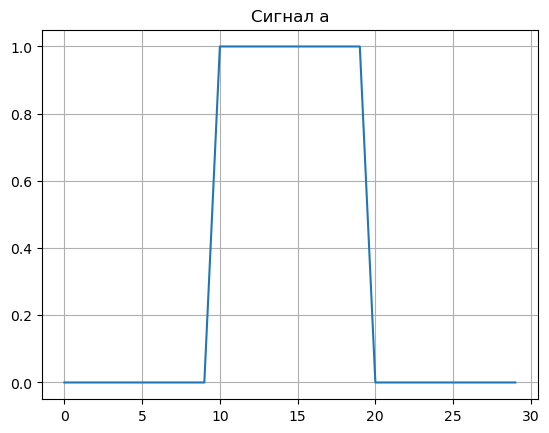

In [1127]:
plt.plot(a)
plt.title("Сигнал a")
plt.grid(True)
plt.show()

Сигнал **b**

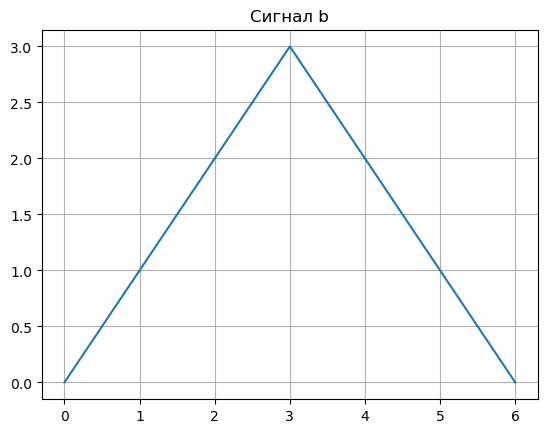

In [1128]:
plt.plot(b)
plt.title("Сигнал b")
plt.grid(True)
plt.show()

Свертка **a** и **b**

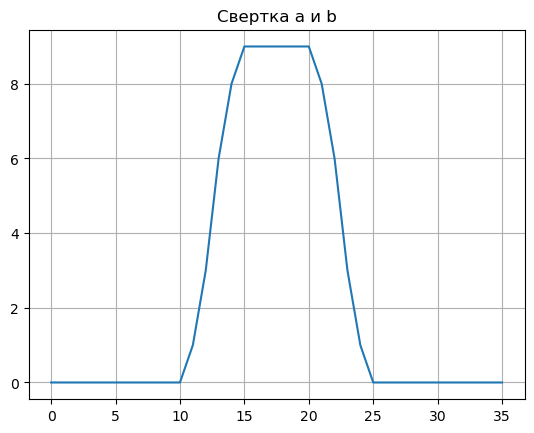

In [1129]:
plt.plot(c)
plt.title("Свертка a и b")
plt.grid(True)
plt.show()

Все 3 графика на одной картинке:

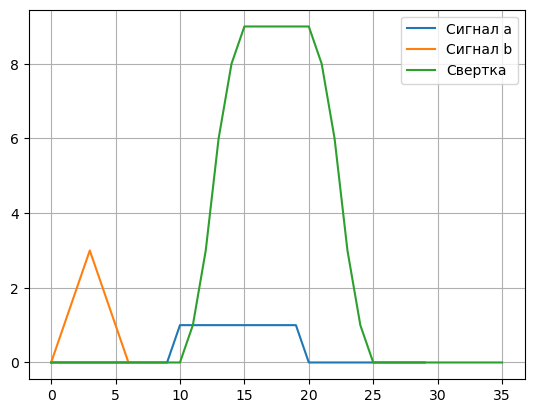

In [1130]:
plt.plot(a,label = "Сигнал a")
plt.legend()
plt.plot(b, label = "Сигнал b")
plt.legend()
plt.plot(c, label = "Свертка")
plt.legend()
plt.grid(True)
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [1131]:
def karplus_strong(noise, N):
    
    sound = np.zeros(N)
    for i in range(len(noise)):
        sound[i] = noise[i]
    for i in range(len(noise), N):
        sound[i] = (sound[i-len(noise)-1] + sound[i-len(noise)]) / 2   
    return sound

In [1132]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


**Полученный аудиосигнал**

In [1134]:
ipd.Audio(data = gen_wav, rate = 44100, autoplay=True)

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

**Нота Ми**

In [783]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 329.63
sec = 2
gen_len1 = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

def karplus_strong(noise, N):
    sound = np.zeros(N)
    for i in range(len(noise)):
        sound[i] = noise[i]
    for i in range(len(noise), N):
        sound[i] = (sound[i-len(noise)-1] + sound[i-len(noise)]) / 2 
    return sound

gen_wav1 = karplus_strong(noise, gen_len1)

In [784]:
ipd.Audio(data = gen_wav1, rate = 44100, autoplay=True)

**Нота Соль**

In [787]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 196.00
sec = 2
gen_len2 = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

def karplus_strong(noise, N):
    sound = np.zeros(N)
    for i in range(len(noise)):
        sound[i] = noise[i]
    for i in range(len(noise), N):
        sound[i] = (sound[i-len(noise)-1] + sound[i-len(noise)]) / 2 
    return sound

gen_wav2 = karplus_strong(noise, gen_len2)

In [788]:
ipd.Audio(data = gen_wav2, rate = 44100, autoplay=True)

**Нота Си, увеличение продолжительности аудио**

In [1160]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 246.94
sec = 5
gen_len3 = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

def karplus_strong(noise, N):
    sound = np.zeros(N)
    for i in range(len(noise)):
        sound[i] = noise[i]
    for i in range(len(noise), N):
        sound[i] = (sound[i-len(noise)-1] + sound[i-len(noise)]) / 2 
    return sound

gen_wav3 = karplus_strong(noise, gen_len3)

In [1161]:
ipd.Audio(data = gen_wav3, rate = 44100, autoplay=True)

Визуализируем затухание амплитуды:

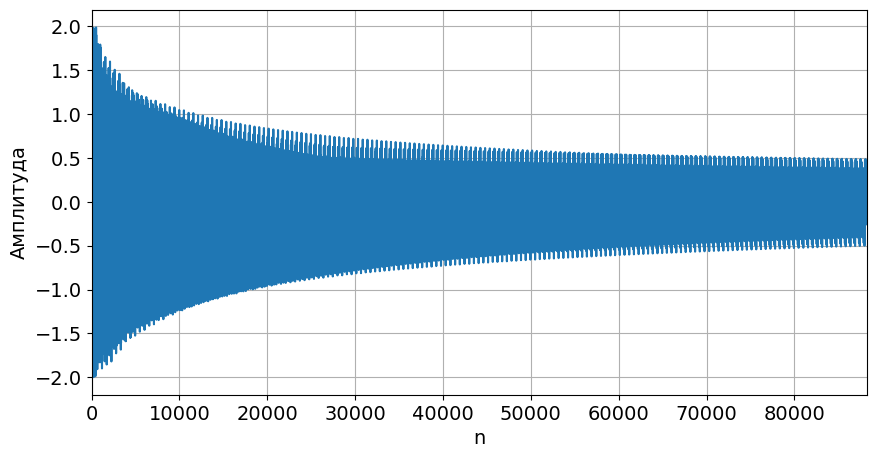

In [789]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

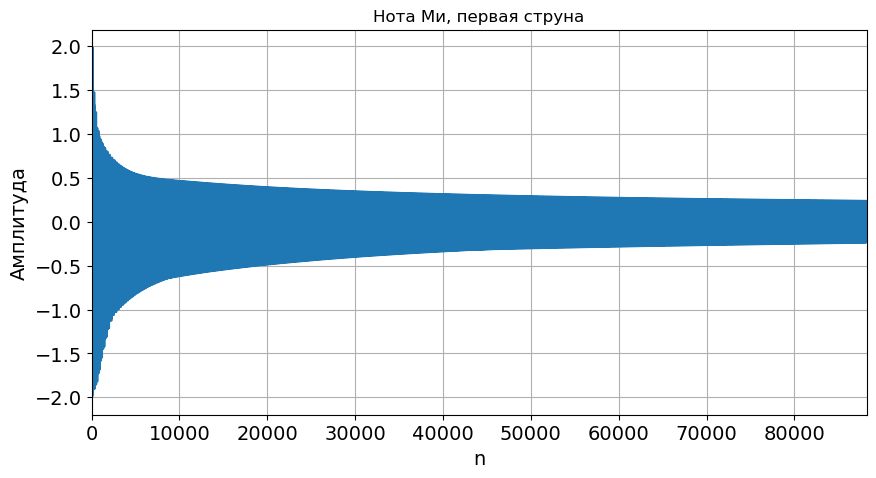

In [1136]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.title('Нота Ми, первая струна')
plt.xlim(0, gen_len1)
plt.plot(np.linspace(0, gen_len1+1, gen_len1), gen_wav1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

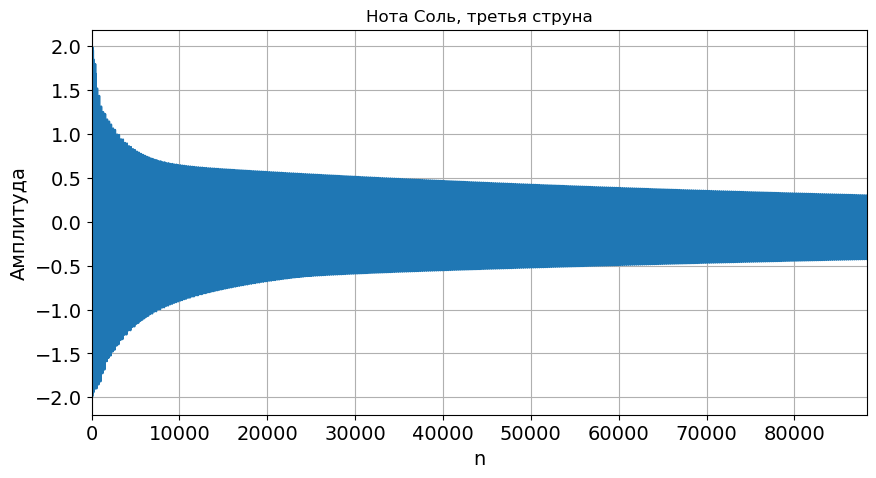

In [1137]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len2)
plt.plot(np.linspace(0, gen_len2+1, gen_len2), gen_wav2)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Нота Соль, третья струна')
plt.grid()

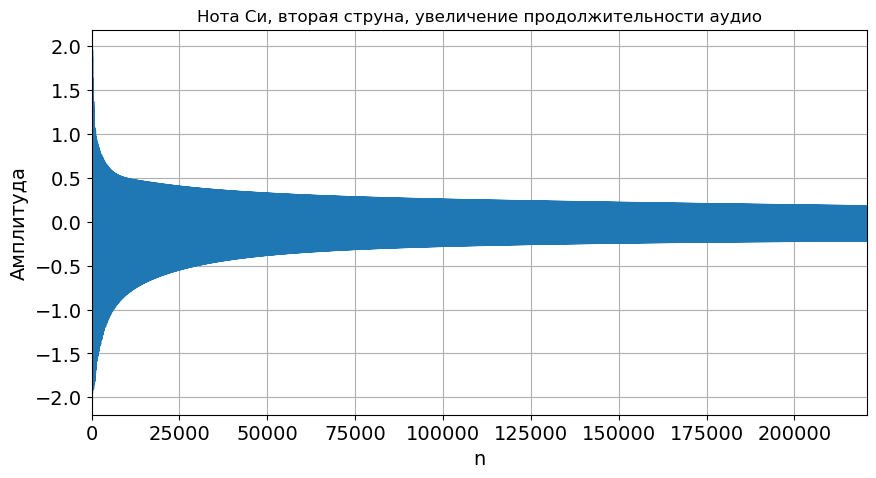

In [1163]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len3)
plt.plot(np.linspace(0, gen_len3+1, gen_len2), gen_wav3)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Нота Си, вторая струна, увеличение продолжительности аудио')
plt.grid()